## Name : Hugo Rodrigues
## Student ID : 23210397

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, FunctionTransformer, OneHotEncoder #needed for data preparation
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config
from sklearn.impute import SimpleImputer

# Task 1

In [145]:
df = pd.read_csv("./bank.csv") # Dataset loading

Description of the feastures:

- **age** - The age of the person

- **job** - Type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

- **marital** - Marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

- **education** - (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

- **default** -has credit in default?

- **balance** -Aaverage yearly balance euros

- **housing** - Has housing loan?

- **loan** - Has personal loan?

- **contact** - Contact communication type (categorical: 'cellular','telephone')

- **day** - Last contact day of the week

- **month** - Last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

- **duration** - Last contact duration, in seconds (numeric)

- **campaign** - number of contacts performed during this campaign and for this client (numeric, includes last contact)

- **pdays** - number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously 
contacted)

- **previous** - number of contacts performed before this campaign and for this client

- **poutcome** - outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

- **subscribed** - has the client subscribed a term deposit?

In [146]:
df.head()

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [147]:
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

In [148]:
df.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

In [149]:
print(f"The dataset provided has {df.shape[0]} samples.")
print(f"The dataset provided has {df.shape[1]} atributes.")

The dataset provided has 2000 samples.
The dataset provided has 17 atributes.


In [150]:
df.isna().sum() # Missing Values check

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

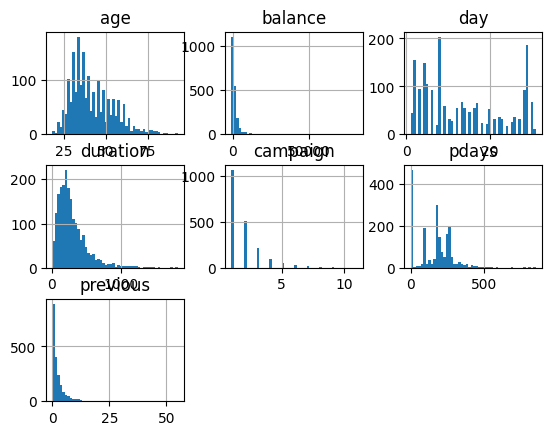

In [151]:
df.hist(bins=50)

<Axes: >

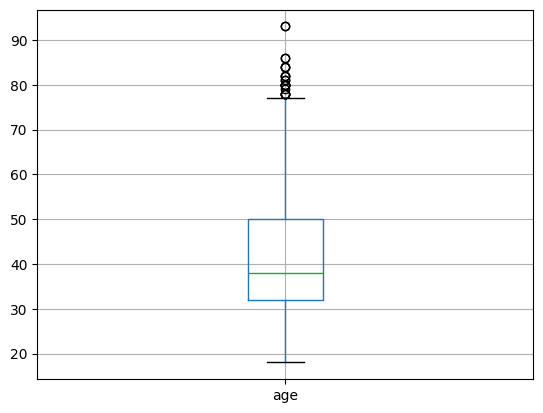

In [154]:
df.boxplot(column='age')

<Axes: >

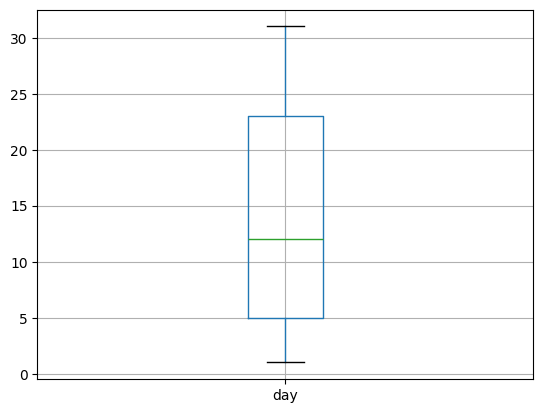

In [160]:
df.boxplot(column='day')

<Axes: >

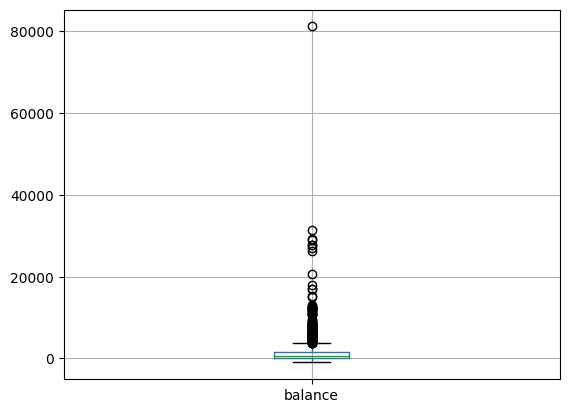

In [155]:
df.boxplot(column='balance')

<Axes: >

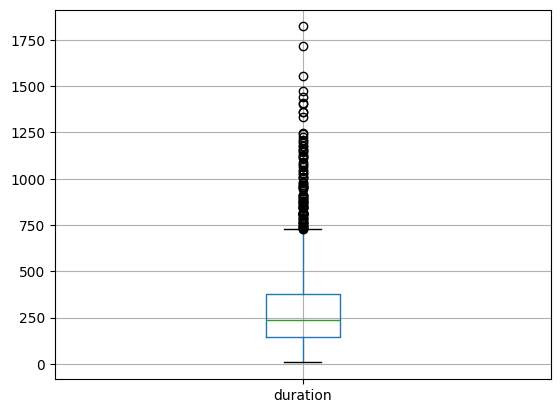

In [156]:
df.boxplot(column='duration')

<Axes: >

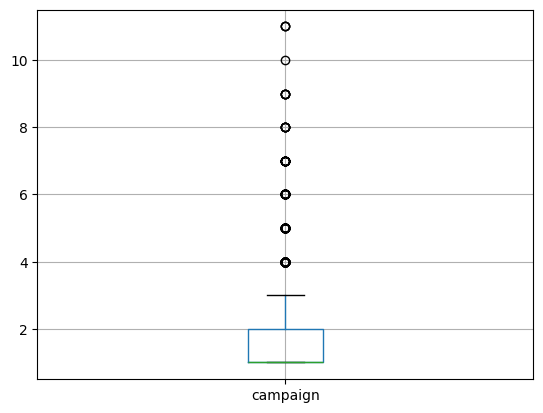

In [157]:
df.boxplot(column='campaign')

<Axes: >

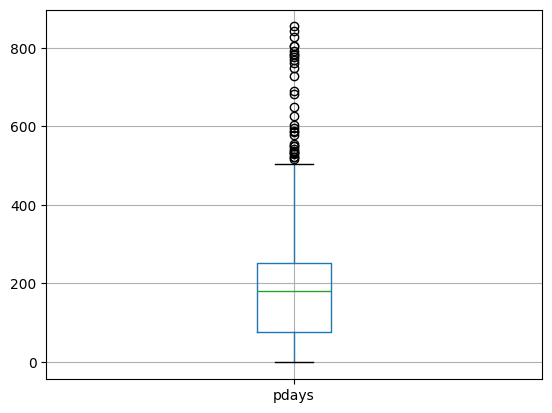

In [158]:
df.boxplot(column='pdays')

<Axes: >

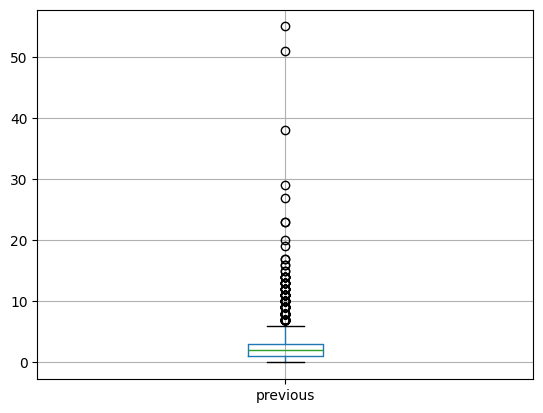

In [159]:
df.boxplot(column='previous')

Every attribbute but day contain a considerable amount of outliers that should be treated using, preferably, robuts scaler. 

In [161]:
# Encode the ordinal features using mapping to transform categorical features into numerical features
job_map = {
    'management': 0,
    'technician': 1,
    'blue-collar': 2,
    'admin.': 3,
    'services': 4,
    'retired': 5,
    'student': 6,
    'unemployed' : 7,
    'self-employed' : 8,
    'entrepreneur' : 9,
    'housemaid' : 10
}

education_map = {
    'primary' : 0,
    'secondary' : 1, 
    'tertiary' : 2 
    
} 
    
marital_map = {
    'single' : 0,
    'married' : 1, 
    'divorced' : 2 
    
}

month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Transformation from categorical into numerical
def encode(df_pre):
    '''Function to encode categorical values using 
    mapping to transform categorical features into 
    numerical features.'''
    df_pre.loc[:,'job'] = df_pre['job'].map(job_map)
    df_pre.loc[:,'education'] = df_pre['education'].map(education_map)
    df_pre.loc[:,'marital'] = df_pre['marital'].map(marital_map)
    df_pre.loc[:,'month'] = df_pre['month'].map(month_map)
  
    return df_pre

df = encode(df)
df.head()

age  job marital education default  balance housing loan   contact  day  \
0  32.0  1.0       0       2.0      no      392     yes   no  cellular    1   
1  39.0  1.0       2       1.0      no      688     yes  yes  cellular    1   
2  59.0  5.0       1       1.0      no     1035     yes  yes  cellular    1   
3  47.0  2.0       1       1.0      no      398     yes  yes  cellular    1   
4  54.0  5.0       1       1.0      no     1004     yes   no  cellular    1   

  month  duration  campaign  pdays  previous poutcome subscribed  
0     4       957         2    131         2  failure         no  
1     4       233         2    133         1  failure         no  
2     4       126         2    239         1  failure         no  
3     4       274         1    238         2  failure         no  
4     4       479         1    307         1  failure         no

In [162]:
df.tail()

age  job marital education default  balance housing loan    contact  \
1995  20.0  6.0       0       NaN      no     2785      no   no   cellular   
1996  28.0  3.0       0       1.0      no      127      no   no   cellular   
1997  81.0  5.0       1       0.0      no     1154      no   no  telephone   
1998  46.0  4.0       1       0.0      no     4343     yes   no        NaN   
1999  40.0  9.0       1       1.0      no     6403      no   no   cellular   

      day month  duration  campaign  pdays  previous poutcome subscribed  
1995   16     9       327         2     -1         0      NaN        yes  
1996   16     9      1334         2     -1         0      NaN        yes  
1997   17     9       231         1     -1         0      NaN        yes  
1998   20     9       185         1     -1         0      NaN        yes  
1999   22     9       208         2     -1         0      NaN        yes

In [163]:
# Numerical and categorical data should be transformed in different ways so I define num_col for numerical 
# columns (numbers) and cat_cols for categorical columns.

num_cols = ['age', 'job', 'marital', 'education', 'balance', 'duration', 'campaign' , 'pdays', 'previous']

cat_cols = ['default', 'housing', 'loan', 'contact', 'month', 'subscribed']

In [164]:
# Creation of pipelines for categorical and numerical

num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale',MinMaxScaler())
])
cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot',OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [165]:
# Column transformer
column_transformer = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline,num_cols),
    ('cat_pipeline',cat_pipeline,cat_cols)
    ],
    remainder='drop')

In [166]:

clf = LogisticRegression(random_state=0)
clf_pipeline = Pipeline(steps=[
    ('col_trans', column_transformer),
    ('model', clf)
])

In [167]:
set_config(display='diagram')
display(clf_pipeline)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['age', 'job', 'marital',
                                                   'education', 'balance',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['default', 'housing', 'loan',
                                                   'contact', 'month',
                                                   'subscribed'])])),
                ('model', LogisticRegression(random_state=0))])

In [168]:
# Columns to apply RobustScaler
columns_to_scale = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Define the pipeline
pipeline = Pipeline([
    ('scaler', ColumnTransformer(
        transformers=[
            ('robust_scaler', RobustScaler(), columns_to_scale)
        ],
        remainder='passthrough'  # Pass through columns not being scaled
    ))
])

# Fit and transform the DataFrame
scaled_data = pipeline.fit_transform(df)

# Convert the result back to a DataFrame
df = pd.DataFrame(scaled_data, columns=df.columns)

In [169]:
df.head()

age       job   marital education   default balance housing loan  \
0 -0.333333 -0.110187  3.094421       1.0 -0.291013     0.0     1.0    0   
1  0.055556  0.094941 -0.012876       1.0 -0.279601    -0.5     1.0    2   
2  1.166667  0.335412 -0.472103       1.0   0.32525    -0.5     5.0    1   
3       0.5 -0.106029   0.16309       0.0  0.319544     0.0     2.0    1   
4  0.888889  0.313929  1.042918       0.0  0.713267    -0.5     5.0    1   

  contact day month duration  campaign pdays previous poutcome subscribed  
0     2.0  no   yes       no  cellular     1        4  failure         no  
1     1.0  no   yes      yes  cellular     1        4  failure         no  
2     1.0  no   yes      yes  cellular     1        4  failure         no  
3     1.0  no   yes      yes  cellular     1        4  failure         no  
4     1.0  no   yes       no  cellular     1        4  failure         no

In [170]:
df.tail()

age       job   marital education   default balance housing loan  \
1995      -1.0  1.548164  0.390558       1.0 -1.044223    -1.0     6.0    0   
1996 -0.555556 -0.293832  4.712446       1.0 -1.044223    -1.0     3.0    0   
1997  2.388889  0.417879 -0.021459       0.0 -1.044223    -1.0     5.0    1   
1998  0.444444  2.627859 -0.218884       0.0 -1.044223    -1.0     4.0    1   
1999  0.111111   4.05544 -0.120172       1.0 -1.044223    -1.0     9.0    1   

     contact day month duration   campaign pdays previous poutcome subscribed  
1995     NaN  no    no       no   cellular    16        9      NaN        yes  
1996     1.0  no    no       no   cellular    16        9      NaN        yes  
1997     0.0  no    no       no  telephone    17        9      NaN        yes  
1998     0.0  no   yes       no        NaN    20        9      NaN        yes  
1999     1.0  no    no       no   cellular    22        9      NaN        yes